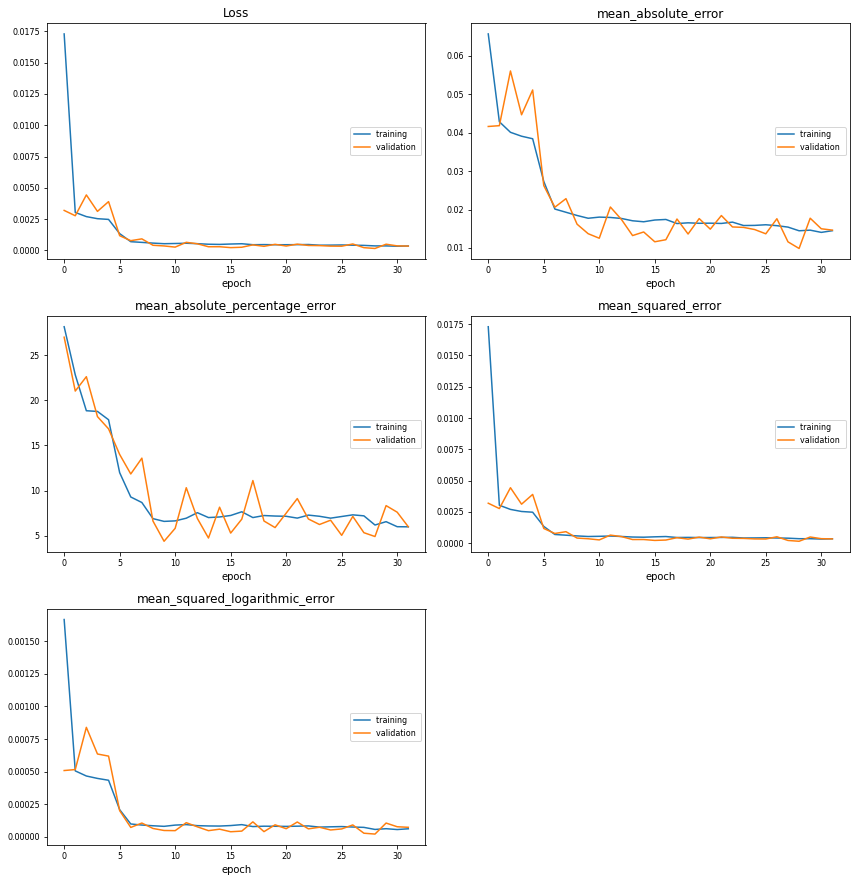

Loss
	training         	 (min:    0.000, max:    0.017, cur:    0.000)
	validation       	 (min:    0.000, max:    0.004, cur:    0.000)
mean_absolute_error
	training         	 (min:    0.014, max:    0.066, cur:    0.014)
	validation       	 (min:    0.010, max:    0.056, cur:    0.015)
mean_absolute_percentage_error
	training         	 (min:    5.994, max:   28.149, cur:    5.994)
	validation       	 (min:    4.394, max:   26.990, cur:    5.999)
mean_squared_error
	training         	 (min:    0.000, max:    0.017, cur:    0.000)
	validation       	 (min:    0.000, max:    0.004, cur:    0.000)
mean_squared_logarithmic_error
	training         	 (min:    0.000, max:    0.002, cur:    0.000)
	validation       	 (min:    0.000, max:    0.001, cur:    0.000)
35100/35100 - 15s - loss: 3.5427e-04 - mean_squared_error: 3.5427e-04 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 5.9942 - mean_squared_logarithmic_error: 6.0703e-05 - val_loss: 3.4700e-04 - val_mean_squared_error:

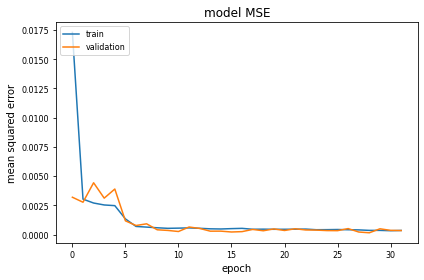

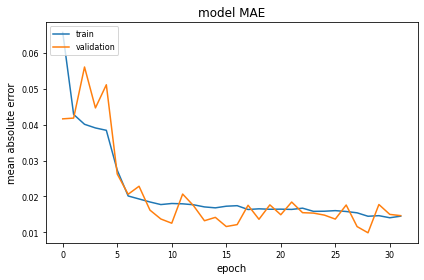

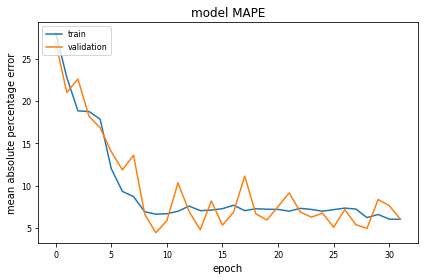

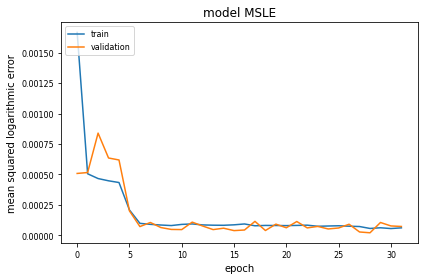

[INFO] predicting...
Final score (MSE): 0.0003469962892494844
Final score (MAE): 0.014626433109049127
Final score (RMSE): 0.018627836408168407


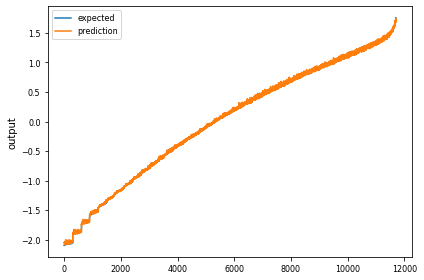

In [2]:
#!/usr/bin/env python
# coding: utf-8

%matplotlib inline
#%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Dropout
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor
from sklearn import metrics
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

import os;
path="."
os.chdir(path)
os.getcwd()

import csv

from IPython.display import clear_output
from livelossplot import PlotLossesKeras
from time import time
from keras.callbacks import TensorBoard

from keras.utils.vis_utils import plot_model
from keras.models import load_model

from ann_visualizer.visualize import ann_viz;
from keras.models import model_from_json

from keras_sequential_ascii import keras2ascii
from livelossplot import PlotLossesKeras

from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d

from keras.optimizers import SGD, Adam, RMSprop, Adagrad
import pickle

import sys
sys.path.insert(0, '../../../../../Utilities/')

from plotting import newfig, savefig

from matplotlib import rc
rc("text", usetex=False)

with open('../../../../Data/TCs_air5.txt') as f:
    lines = (line for line in f if not line.startswith('#'))
    dataset = np.loadtxt(lines, skiprows=1)

#dataset = np.loadtxt("../../../Data/TCs_air5.txt")
x = dataset[:,0:7] # T, P, x_N2, x_O2, x_NO, x_N, x_O
y = dataset[:,7:8] # shear

# 2D Plot
plt.scatter(x[:,0], y, s=0.5)
#plt.title('$R_{ci}$ for $N_2/N$ and i = 10')
#plt.xlabel('T [K]')
#plt.ylabel('$R_{ci}$ $[J/m^3/s]$')
plt.tight_layout()
plt.savefig("shear_data.pdf")
plt.show()

print("[INFO] Split data ...")
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.75, test_size=0.25, random_state=69)

print("[INFO] StandardScaling data ...")
#y=np.reshape(y, (-1,1))
sc_x = StandardScaler() #MinMaxScaler() #StandardScaler() #RobustScaler() #MaxAbsScaler()
sc_y = StandardScaler()

sc_x.fit(x_train)
x_train = sc_x.transform(x_train)
x_test  = sc_x.transform(x_test)

sc_y.fit(y_train)
y_train = sc_y.transform(y_train)
y_test  = sc_y.transform(y_test)

print("[INFO] Model build ...")
model = Sequential()

model.add(Dense(7, input_dim=7, kernel_initializer='normal', activation='relu')) # Hidden 1
#model.add(Dense(7, kernel_initializer='normal', activation='relu'))              # Hidden 2
#model.add(Dense(7, kernel_initializer='normal', activation='relu'))              # Hidden 2
#model.add(Dense(7, kernel_initializer='normal', activation='relu'))              # Hidden 2
#model.add(Dense(100, kernel_initializer='normal', activation='relu'))              # Hidden 2
#model.add(Dense(100, kernel_initializer='normal', activation='relu'))              # Hidden 2
#model.add(Dense(100, kernel_initializer='normal', activation='relu'))              # Hidden 2
#model.add(Dense(100, kernel_initializer='normal', activation='relu'))              # Hidden 2
#model.add(Dense(100, kernel_initializer='normal', activation='relu'))              # Hidden 2
#model.add(Dense(100, kernel_initializer='normal', activation='relu'))              # Hidden 2
model.add(Dense(1, activation='linear'))                                            # Output
#opt = keras.optimizers.SGD(lr=0.01, momentum=0.9, decay=0.01)
opt = keras.optimizers.Adam(learning_rate=0.01)

model.summary()

keras2ascii(model)

# mse:  loss = square(y_true - y_pred)
# mae:  loss = abs(y_true - y_pred)
# mape: loss = 100 * abs(y_true - y_pred) / y_true
# msle: loss = square(log(y_true + 1.) - log(y_pred + 1.))
model.compile(loss='mse', metrics=['mse', 'mae', 'mape', 'msle'], optimizer=opt)

#monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto', restore_best_weights=True)

print("[INFO] training model...")
history = model.fit(x_train, y_train, epochs=32, batch_size=16, verbose=2, validation_data=(x_test, y_test), callbacks=[PlotLossesKeras()])

#loss_history = np.array(history)
#np.savetxt("loss_history.txt", loss_history, delimiter=",")

# Plot metrics
print(history.history.keys())

# "Loss"
plt.figure()
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('model MSE')
plt.ylabel('mean squared error')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.tight_layout()
plt.savefig("MSE.pdf", dpi=150)
plt.show()

plt.figure()
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model MAE')
plt.ylabel('mean absolute error')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.tight_layout()
plt.savefig("MAE.pdf", dpi=150)
plt.show()

plt.figure()
plt.plot(history.history['mean_absolute_percentage_error'])
plt.plot(history.history['val_mean_absolute_percentage_error'])
plt.title('model MAPE')
plt.ylabel('mean absolute percentage error')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.tight_layout()
plt.savefig("MAPE.pdf", dpi=150)
plt.show()

plt.figure()
plt.plot(history.history['mean_squared_logarithmic_error'])
plt.plot(history.history['val_mean_squared_logarithmic_error'])
plt.title('model MSLE')
plt.ylabel('mean squared logarithmic error')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.tight_layout()
plt.savefig("MSLE.pdf", dpi=150)
plt.show()

# Predict
print("[INFO] predicting...")
pred = model.predict(x_test)

score = metrics.mean_squared_error(pred, y_test)
print("Final score (MSE): {}".format(score))

score = metrics.mean_absolute_error(pred, y_test)
print("Final score (MAE): {}".format(score))

# Measure RMSE error. RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred, y_test))
print("Final score (RMSE): {}".format(score))

# Regression chart.
def chart_regression(pred, y, sort=True):
    t = pd.DataFrame({'pred': pred, 'y': y.flatten()})
    if sort:
        t.sort_values(by=['y'], inplace=True)
    plt.plot(t['y'].tolist(), label='expected')
    plt.plot(t['pred'].tolist(), label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.tight_layout()
    plt.savefig("adim_regression.pdf", dpi=150)
    plt.show()

# Plot the chart
chart_regression(pred.flatten(), y_test)

#Xnew = np.array([[6750], [6800], [6850],[6900], [6950],
#                 [7000], [7050],[7100], [7150], [7200], [7300], [7400], [7500], [7600], [7700], [7800], [7900],
#                 [8000], [8100], [8200], [8300], [8400], [8500], [8600], [8700], [8800], [8900],
#                 [9000], [9100], [9200], [9300], [9400], [9500], [9600], [9700], [9800], [9900],
#                 [10000], [10100], [10200], [10300], [10400], [10500], [10757]])
#
#Xnew = scaler_x.transform(Xnew)
#ynew = model.predict(Xnew)
#
# Invert normalize
#ynew = scaler_y.inverse_transform(ynew)
#Xnew = scaler_x.inverse_transform(Xnew)
# show the inputs and predicted outputs
#for i in range(len(Xnew)):
#    print("X=%s, Predicted=%s" % (Xnew[i], ynew[i]))
#
#print(x.min(), x.max())
#
#plt.scatter(x[:], y[:], s=15, facecolor='red', label='MATLAB')
#plt.plot(Xnew[:], ynew[:], 'o', color='black', label='predicted', linewidth=2, markersize=5, fillstyle='none')
#plt.title('$R_{ci}$ for $N_2/N$ and i = 10')
#plt.ylabel('$R_{ci}$ $[J/m^3/s]$')
#plt.xlabel('T [K] ')
#plt.legend()
#plt.tight_layout()
#plt.savefig("dim_regression.pdf", dpi=150, crop='false')
#plt.show()